In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dropout, Dense, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [29]:
from tensorflow.keras.datasets import cifar10
cifar_10 = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar_10
x_train.shape

(50000, 32, 32, 3)

In [30]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
length = len(set(y_train))
length

10

In [31]:
i = Input(shape=x_train[0].shape)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(length, activation='softmax')(x)
model = Model(i, x)

In [32]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.4318 - loss: 1.8428 - val_accuracy: 0.6601 - val_loss: 0.9448
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6661 - loss: 0.9553 - val_accuracy: 0.6918 - val_loss: 0.8838
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7270 - loss: 0.7841 - val_accuracy: 0.7438 - val_loss: 0.7428
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7687 - loss: 0.6782 - val_accuracy: 0.7452 - val_loss: 0.7499
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7909 - loss: 0.6086 - val_accuracy: 0.7089 - val_loss: 0.8573
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8185 - loss: 0.5333 - val_accuracy: 0.7765 - val_loss: 0.7067
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8379 - loss: 0.4781 - val_accuracy: 0.7778 - val_loss: 0.6542
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8540 - loss: 0

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_gen = datagen.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_gen, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:11 161ms/step - accuracy: 0.8750 - loss: 0.4478

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8532 - loss: 0.4400 - val_accuracy: 0.8546 - val_loss: 0.4387
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8750 - loss: 0.2615

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.8750 - loss: 0.2615 - val_accuracy: 0.8566 - val_loss: 0.4337
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8626 - loss: 0.4061 - val_accuracy: 0.8501 - val_loss: 0.4451
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.9688 - loss: 0.1570 - val_accuracy: 0.8495 - val_loss: 0.4449
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8671 - loss: 0.3916 - val_accuracy: 0.8644 - val_loss: 0.4039
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8438 - loss: 0.3320 - val_accuracy: 0.8635 - val_loss: 0.4052
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.8674 - loss: 0.3828 - val_accuracy: 0.8639 - val_loss: 0.4129
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.8438 - loss: 0.3961 - val_accuracy: 0.8641 - val_loss: 0.4129
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8713 - loss: 0.37

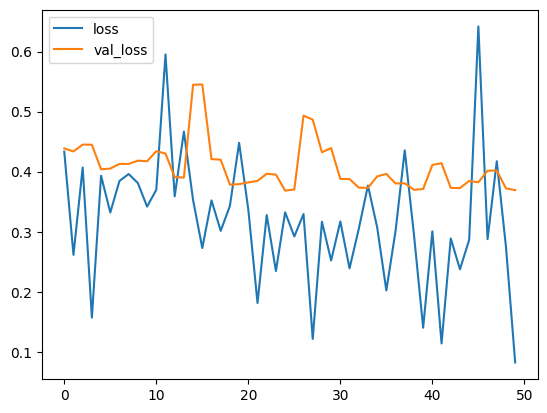

In [35]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

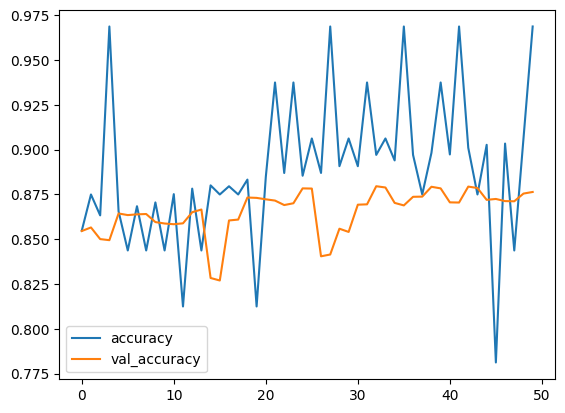

In [36]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [37]:
labels = '''airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck'''.split(',')

In [38]:
p_test = model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


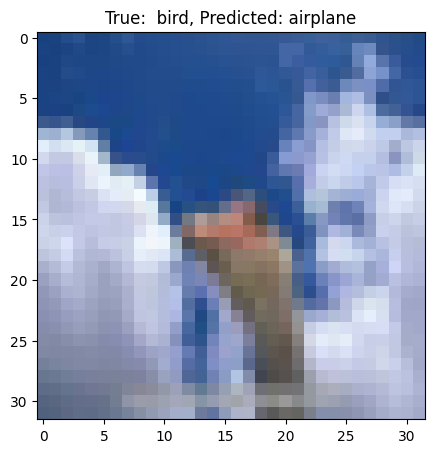

In [39]:
index = np.where(p_test != y_test)
i = np.random.choice(index[0])
plt.figure(figsize=(5,6), dpi=100)
plt.imshow(x_test[i])
plt.title(f'True: {labels[y_test[i]]}, Predicted: {labels[p_test[i]]}')
plt.show()

In [40]:
import cv2
img = plt.imread('cat.jpg') / 255.0
img = cv2.resize(img, (32, 32))
img = np.expand_dims(img, axis=0)
model.predict(img).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


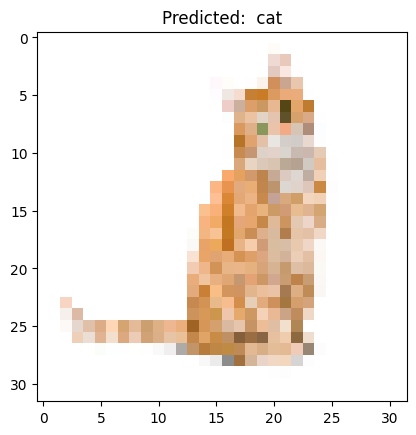

In [41]:
plt.imshow(img[0])
plt.title(f'Predicted: {labels[model.predict(img).argmax()]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


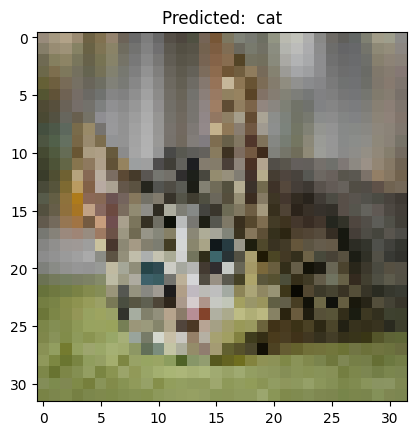

In [42]:
img1 = plt.imread('cat2.jpg') / 255.0
img1 = cv2.resize(img1, (32,32))
img1 = np.expand_dims(img1, axis=0)
p1 = model.predict(img1).argmax()
p1.shape
plt.imshow(img1[0])
plt.title(f'Predicted: {labels[p1]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


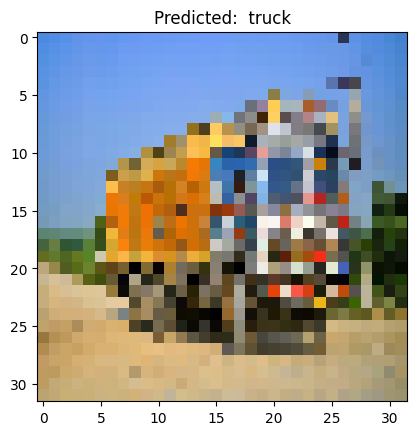

In [43]:
img2 = plt.imread('truck1.jpg') / 255.0
img2 = cv2.resize(img2, (32,32))
img2 = np.expand_dims(img2, axis=0)
p2 = model.predict(img2).argmax()
plt.imshow(img2[0])
plt.title(f'Predicted: {labels[p2]}')
plt.show()